## Airline Review Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import pickle

In [3]:
df=pd.read_csv(r"D:\MachineLearning\DataScienceCourse\Airline_review.csv")
df.head(3)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,Nov-19,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,Jun-19,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,Jun-19,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop("Date Flown",axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23171 non-null  object 
 1   Overall_Rating          23171 non-null  object 
 2   Review_Title            23171 non-null  object 
 3   Review Date             23171 non-null  object 
 4   Verified                23171 non-null  bool   
 5   Review                  23171 non-null  object 
 6   Aircraft                7129 non-null   object 
 7   Type Of Traveller       19433 non-null  object 
 8   Seat Type               22075 non-null  object 
 9   Route                   19343 non-null  object 
 10  Seat Comfort            19016 non-null  float64
 11  Cabin Staff Service     18911 non-null  float64
 12  Food & Beverages        14500 non-null  float64
 13  Ground Service          18378 non-null  float64
 14  Inflight Entertainment  10829 non-null

In [7]:
# Checking duplicate rows:
df.duplicated().value_counts()

False    23051
True       120
Name: count, dtype: int64

In [8]:
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23051 entries, 0 to 23050
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23051 non-null  object 
 1   Overall_Rating          23051 non-null  object 
 2   Review_Title            23051 non-null  object 
 3   Review Date             23051 non-null  object 
 4   Verified                23051 non-null  bool   
 5   Review                  23051 non-null  object 
 6   Aircraft                7127 non-null   object 
 7   Type Of Traveller       19424 non-null  object 
 8   Seat Type               22062 non-null  object 
 9   Route                   19335 non-null  object 
 10  Seat Comfort            19007 non-null  float64
 11  Cabin Staff Service     18902 non-null  float64
 12  Food & Beverages        14496 non-null  float64
 13  Ground Service          18369 non-null  float64
 14  Inflight Entertainment  10827 non-null

In [10]:
df.duplicated().value_counts()

False    23051
Name: count, dtype: int64

In [11]:
# For categorical columns
df['Aircraft']=df['Aircraft'].fillna(df['Aircraft'].mode().iloc[0])
df['Type Of Traveller']=df['Type Of Traveller'].fillna(df['Type Of Traveller'].mode().iloc[0])
df['Seat Type']=df['Seat Type'].fillna(df['Seat Type'].mode().iloc[0])
df['Route']=df['Route'].fillna(df['Route'].mode().iloc[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23051 entries, 0 to 23050
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23051 non-null  object 
 1   Overall_Rating          23051 non-null  object 
 2   Review_Title            23051 non-null  object 
 3   Review Date             23051 non-null  object 
 4   Verified                23051 non-null  bool   
 5   Review                  23051 non-null  object 
 6   Aircraft                23051 non-null  object 
 7   Type Of Traveller       23051 non-null  object 
 8   Seat Type               23051 non-null  object 
 9   Route                   23051 non-null  object 
 10  Seat Comfort            19007 non-null  float64
 11  Cabin Staff Service     18902 non-null  float64
 12  Food & Beverages        14496 non-null  float64
 13  Ground Service          18369 non-null  float64
 14  Inflight Entertainment  10827 non-null

In [13]:
# For numerical columns
l=['Seat Comfort','Cabin Staff Service','Food & Beverages','Ground Service','Inflight Entertainment','Wifi & Connectivity','Value For Money']
for i in l:
    df[i]=df[i].fillna(df[i].median())

## EDA (Data Visualization):

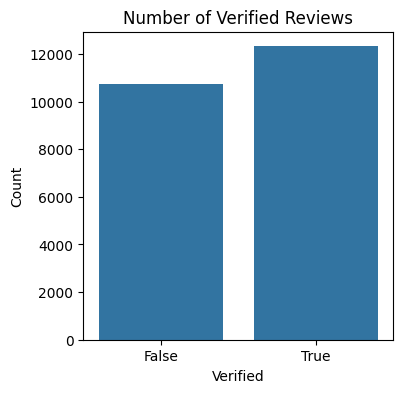

In [27]:
# Verified Reviews
plt.figure(figsize=(4, 4))
sns.countplot(x='Verified', data=df)
plt.title('Number of Verified Reviews')
plt.xlabel('Verified')
plt.ylabel('Count')
plt.show()

In [24]:
# Type of Traveller Distribution
traveler_distribution = df['Type Of Traveller'].value_counts()

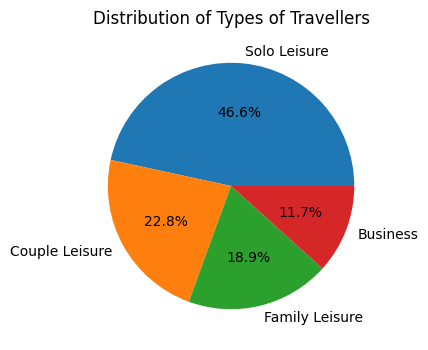

In [26]:
# Distribution of types of Travellers
plt.figure(figsize=(6, 4))
traveler_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Types of Travellers')
plt.ylabel('')
plt.show()

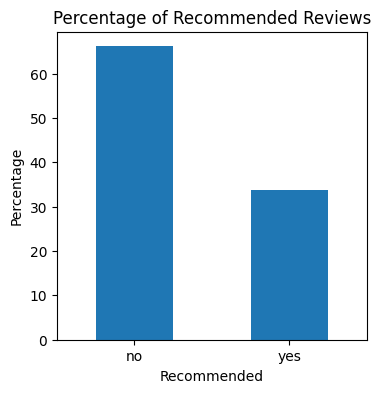

In [30]:
# Percetage of recommened reviews
recommended_percentage = df['Recommended'].value_counts(normalize=True) * 100
plt.figure(figsize=(4, 4))
recommended_percentage.plot(kind='bar', rot=0)
plt.title('Percentage of Recommended Reviews')
plt.xlabel('Recommended')
plt.ylabel('Percentage')
plt.show()

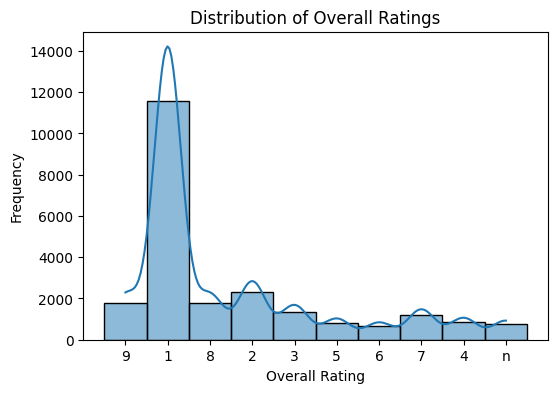

In [33]:
# Histogram of Overall Ratings:
plt.figure(figsize=(6, 4))
sns.histplot(df['Overall_Rating'], bins=10, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\Vidul\AppData\Local\Temp\ipykernel_34468\2586659521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.index, y=top_routes.values, palette=colors)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Melbourne to Sydney'),
  Text(1, 0, 'Sydney to Melbourne'),
  Text(2, 0, 'Cape Town to Johannesburg'),
  Text(3, 0, 'Cusco to Lima'),
  Text(4, 0, 'Bangkok to Phuket'),
  Text(5, 0, 'Johannesburg to Cape Town'),
  Text(6, 0, 'Kuala Lumpur to Singapore'),
  Text(7, 0, 'Bangkok to Chiang Mai'),
  Text(8, 0, 'Johannesburg to Durban'),
  Text(9, 0, 'Toronto to Calgary')])

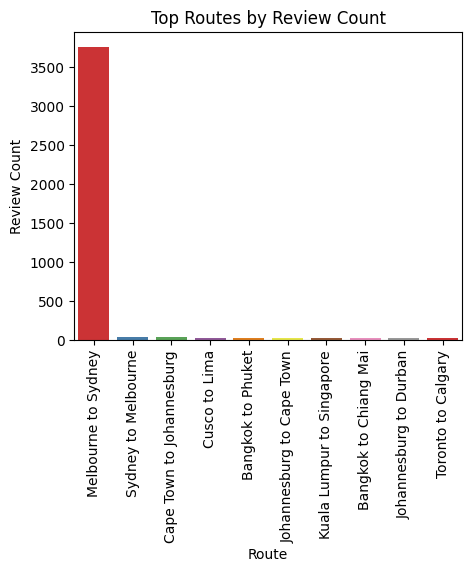

In [40]:
# Bar Plot for Top Routes:
top_routes = df['Route'].value_counts().head(10)
plt.figure(figsize=(5, 4))
colors = sns.color_palette("Set1", len(top_routes))
sns.barplot(x=top_routes.index, y=top_routes.values, palette=colors)
plt.title('Top Routes by Review Count')
plt.xlabel('Route')
plt.ylabel('Review Count')
plt.xticks(rotation=90)

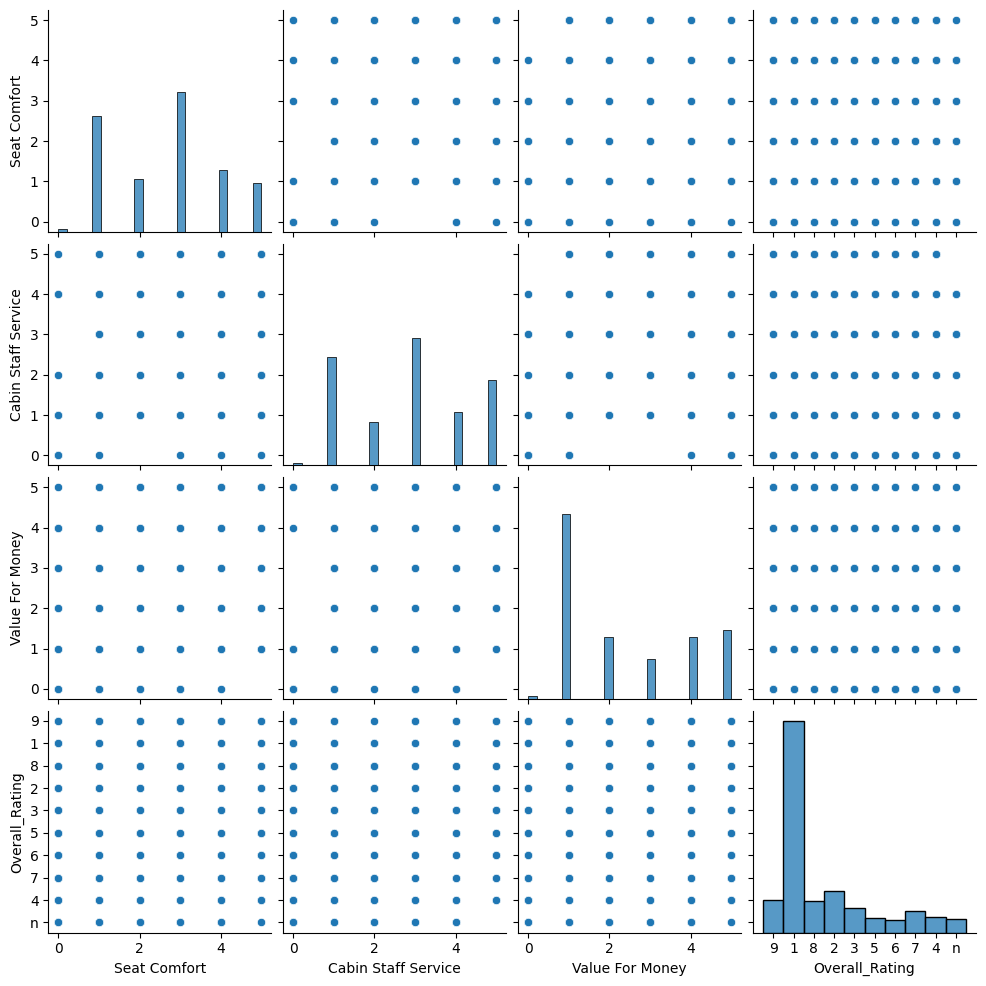

In [42]:
# Pairwise Scatterplot for Correlation:
sns.pairplot(df, vars=['Seat Comfort', 'Cabin Staff Service', 'Value For Money', 'Overall_Rating'])

In [43]:
## Removing unnecessary columns:
df.drop("Route",axis=1,inplace=True)
df.drop("Aircraft",axis=1,inplace=True)
df.drop("Review Date",axis=1,inplace=True)
df.drop("Airline Name",axis=1,inplace=True)


## Encoding

In [44]:
df['Verified']=df['Verified'].replace({'True':1,'False':0})
df['Type Of Traveller']=df['Type Of Traveller'].replace({'Solo Leisure':1,'Couple Leisure':2,'Family Leisure':3,'Business':4})
df['Seat Type']=df['Seat Type'].replace({'Economy Class':1,'Business Class':2,'Premium Economy':3,'First Class':4})
df['Recommended']=df['Recommended'].replace({'yes':1,'no':0})

df['Overall_Rating']=df['Overall_Rating'].replace('n',10)

In [45]:
df['Overall_Rating']=df['Overall_Rating'].astype(int)

In [46]:
l=["Overall_Rating","Review_Title","Cabin Staff Service","Food & Beverages","Recommended"]
df=df[l]

df.head(3)

,Overall_Rating,Review_Title,Cabin Staff Service,Food & Beverages,Recommended
0,9,"""pretty decent airline""",5.0,4.0,1
1,1,"""Not a good airline""",2.0,1.0,0
2,1,"""flight was fortunately short""",1.0,1.0,0


## Preprocessing using spacy:

In [47]:
nlp=spacy.load("en_core_web_sm")

C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [48]:
# Important words (so that they are not lost)
exceptions = ["not", "never", "bad", "nice", "good", "great", "poor", "excellent","no"]
def preprocess (text):
    text = text.lower() # to convert to lowercase (so that we can add exceptions properly)
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.text in exceptions:
            filtered_tokens.append(token.text)
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [49]:
df['Review']=df['Review_Title'].apply(lambda x: preprocess(x))

C:\Users\Vidul\AppData\Local\Temp\ipykernel_34468\4282974474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review']=df['Review_Title'].apply(lambda x: preprocess(x))


In [50]:
df.head(5)

,Overall_Rating,Review_Title,Cabin Staff Service,Food & Beverages,Recommended,Review
0,9,"""pretty decent airline""",5.0,4.0,1,pretty decent airline
1,1,"""Not a good airline""",2.0,1.0,0,not good good airline
2,1,"""flight was fortunately short""",1.0,1.0,0,flight fortunately short
3,1,"""I will never fly again with Adria""",1.0,2.0,0,never fly adria
4,1,"""it ruined our last days of holidays""",1.0,1.0,0,ruin day holiday


In [51]:
df.columns

Index(['Overall_Rating', 'Review_Title', 'Cabin Staff Service',
       'Food & Beverages', 'Recommended', 'Review'],
      dtype='object')

In [52]:
df=df.rename(columns={'Cabin Staff Service': 'Cabin_Staff_Service', 'Food & Beverages': 'Food_Beverages'})

## Text Vectorization

In [53]:
v1=TfidfVectorizer()
v1.fit(df["Review"])
rev_tfidf = v1.transform(df["Review"])

In [54]:
rev_tfidf

<23051x3892 sparse matrix of type '<class 'numpy.float64'>'
	with 68754 stored elements in Compressed Sparse Row format>

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23051 entries, 0 to 23050
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Overall_Rating       23051 non-null  int32  
 1   Review_Title         23051 non-null  object 
 2   Cabin_Staff_Service  23051 non-null  float64
 3   Food_Beverages       23051 non-null  float64
 4   Recommended          23051 non-null  int64  
 5   Review               23051 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 990.6+ KB


## Splitting

In [56]:
# Combine TF-IDF vectors with the existing numerical columns:

# pd.DataFrame -- to convert into a dataframe
# .toarray() -- converts the sparse TF-IDF matrix into a dense matrix
# pd.concat([...], axis=1) -- concatenates the DataFrames created in the first two parts (TF-IDF vectors for "rev" and "revTitle") and the DataFrame from the third part (remaining numerical columns)

x = pd.concat([pd.DataFrame(rev_tfidf.toarray()), 
               df.drop(columns=["Review_Title", "Review","Recommended"])], axis=1)

In [57]:
y=df["Recommended"]

In [58]:
x

,0,1,2,3,4,5,6,7,8,9,...,3885,3886,3887,3888,3889,3890,3891,Overall_Rating,Cabin_Staff_Service,Food_Beverages
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,5.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,2.0
23047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,2.0
23048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.0,2.0
23049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,4.0,3.0


In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23051 entries, 0 to 23050
Columns: 3895 entries, 0 to Food_Beverages
dtypes: float64(3894), int32(1)
memory usage: 684.9 MB


In [60]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 23051 entries, 0 to 23050
Series name: Recommended
Non-Null Count  Dtype
--------------  -----
23051 non-null  int64
dtypes: int64(1)
memory usage: 180.2 KB


In [61]:
x.columns = x.columns.astype(str)

In [62]:
# scaler = MinMaxScaler()
# scaler.fit(x)
# x = scaler.transform(x)
# x = pd.DataFrame(x)
# x.info()

## TrainTestSplit

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18440, 3895)
(4611, 3895)
(18440,)
(4611,)


In [65]:
y_train

14149    0
3728     1
16249    1
450      0
17987    1
        ..
11964    0
21575    0
5390     0
860      0
15795    0
Name: Recommended, Length: 18440, dtype: int64

## Model Training

## 1) Neural Networks

In [66]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),  # shape of the input data
    keras.layers.Dense(64, activation='relu'),  # hidden layer
    keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
model1.fit(x_train, y_train, epochs=50)

Epoch 1/50
577/577 [==============================] - 7s 7ms/step - loss: 0.3107 - accuracy: 0.8885
Epoch 2/50
577/577 [==============================] - 4s 7ms/step - loss: 0.1759 - accuracy: 0.9310
Epoch 3/50
577/577 [==============================] - 4s 7ms/step - loss: 0.1486 - accuracy: 0.9427
Epoch 4/50
577/577 [==============================] - 5s 8ms/step - loss: 0.1335 - accuracy: 0.9494
Epoch 5/50
577/577 [==============================] - 5s 8ms/step - loss: 0.1220 - accuracy: 0.9530
Epoch 6/50
577/577 [==============================] - 4s 7ms/step - loss: 0.1120 - accuracy: 0.9584
Epoch 7/50
577/577 [==============================] - 4s 8ms/step - loss: 0.1053 - accuracy: 0.9617
Epoch 8/50
577/577 [==============================] - 4s 7ms/step - loss: 0.0997 - accuracy: 0.9653
Epoch 9/50
577/577 [==============================] - 4s 7ms/step - loss: 0.0943 - accuracy: 0.9670
Epoch 10/50
577/577 [==============================] - 4s 7ms/step - loss: 0.0901 - accuracy: 0.9685

In [67]:
# Evaluate the model
loss, accuracy = model1.evaluate(x_train, y_train)
print(f"Test accuracy: {accuracy}")

577/577 [==============================] - 5s 4ms/step - loss: 0.0396 - accuracy: 0.9867
Test accuracy: 0.9867136478424072


## 2) Random Forest Classifier

In [68]:
model2=RandomForestClassifier(n_estimators=100, random_state=42)
model2

RandomForestClassifier(random_state=42)

In [69]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3051
           1       0.92      0.90      0.91      1560

    accuracy                           0.94      4611
   macro avg       0.94      0.93      0.93      4611
weighted avg       0.94      0.94      0.94      4611



## 3) KNeighbors Classifier

In [70]:
model3=KNeighborsClassifier()
model3

KNeighborsClassifier()

In [71]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3051
           1       0.91      0.90      0.91      1560

    accuracy                           0.94      4611
   macro avg       0.93      0.93      0.93      4611
weighted avg       0.94      0.94      0.94      4611



## 4) Decision Tree Classifier

In [72]:
model4=DecisionTreeClassifier() # Increase the max_iter value
model4

DecisionTreeClassifier()

In [73]:
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3051
           1       0.90      0.90      0.90      1560

    accuracy                           0.93      4611
   macro avg       0.93      0.93      0.93      4611
weighted avg       0.93      0.93      0.93      4611



## 5) Logistic Regression

In [74]:
model5=LogisticRegression(max_iter=1000) # Increase the max_iter value
model5

LogisticRegression(max_iter=1000)

In [75]:
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3051
           1       0.85      0.84      0.85      1560

    accuracy                           0.90      4611
   macro avg       0.89      0.88      0.88      4611
weighted avg       0.90      0.90      0.90      4611

[[2827  224]
 [ 254 1306]]


In [76]:
# Sample input data
input_data = [['This airline is great', 9, 5, 4], ['Not a good experience', 2, 3, 2]]

# Create a DataFrame with the input data
input_df = pd.DataFrame(input_data, columns=['Review', 'Overall_Rating', 'Cabin Staff Service', 'Food & Beverages'])

# Preprocess the input data
# 1. Use the same TfidfVectorizer that you used for training data
rev_tfidf = v1.transform(input_df["Review"])

# 2. Concatenate the text features and numerical features
x_input = pd.concat([pd.DataFrame(rev_tfidf.toarray()), input_df.drop(columns=["Review"])], axis=1)
x_input.columns = x_input.columns.astype(str)

# Predict "Recommended" for the input data
y_pred_input = model1.predict(x_input)

# Selecting 0.5 as a threshold in model1
for i, review in enumerate(input_data):
    if(y_pred_input[i]<=0.5):    
        print(f'Review: {review[0]}, Prediction: Not Recommended')
    if(y_pred_input[i]>0.5):
        print(f'Review: {review[0]}, Prediction: Recommended')
    

1/1 [==============================] - 2s 2s/step
Review: This airline is great, Prediction: Recommended
Review: Not a good experience, Prediction: Not Recommended


In [77]:
columns=['Review', 'Overall_Rating', 'Cabin_Staff_Service', 'Food_Beverages']

# Save the trained TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(v1, f)

# Save the trained Random Forest classifier
with open('model.pkl', 'wb') as f:
    pickle.dump(model2, f)

# Save the column names of the feature matrix
with open('column_names.pkl', 'wb') as f:
    pickle.dump(columns, f)